In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
s = pd.Series([1, 3, 4, np.nan, None, 8])
s

0    1.0
1    3.0
2    4.0
3    NaN
4    NaN
5    8.0
dtype: float64

In [3]:
s = pd.Series([1, 3, 4, np.nan, None, 8], dtype=pd.Int64Dtype())
s

0       1
1       3
2       4
3    <NA>
4    <NA>
5       8
dtype: Int64

In [4]:
print(np.nan == np.nan)
print(None == None)

False
True


In [5]:
df = pd.DataFrame({
'col_a':np.random.randint(10, size=8),
'col_b':np.random.random(8),
'col_c':[True, False, True, False, False, True, True, False],
'col_d':pd.date_range('2020-01-01', periods=8),
'col_e':['A','A','A','B','B','B','C','C']
})
df.iloc[2:4, 1:2] = np.nan
df.iloc[3:5, 3] = np.nan
df.iloc[[1,4,6], 0] = np.nan
df

,col_a,col_b,col_c,col_d,col_e
0,6.0,0.491586,True,2020-01-01,A
1,NaN,0.706957,False,2020-01-02,A
2,1.0,NaN,True,2020-01-03,A
3,4.0,NaN,False,NaT,B
4,NaN,0.311882,False,NaT,B
5,5.0,0.932654,True,2020-01-06,B
6,NaN,0.972499,True,2020-01-07,C
7,4.0,0.972119,False,2020-01-08,C


In [6]:
df['col_a'] = df['col_a'].astype('Int64')
df

,col_a,col_b,col_c,col_d,col_e
0,6,0.491586,True,2020-01-01,A
1,<NA>,0.706957,False,2020-01-02,A
2,1,NaN,True,2020-01-03,A
3,4,NaN,False,NaT,B
4,<NA>,0.311882,False,NaT,B
5,5,0.932654,True,2020-01-06,B
6,<NA>,0.972499,True,2020-01-07,C
7,4,0.972119,False,2020-01-08,C


In [7]:
df.isna()

,col_a,col_b,col_c,col_d,col_e
0,False,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,True,False
4,True,False,False,True,False
5,False,False,False,False,False
6,True,False,False,False,False
7,False,False,False,False,False


In [8]:
df.isnull()

,col_a,col_b,col_c,col_d,col_e
0,False,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,True,False
4,True,False,False,True,False
5,False,False,False,False,False
6,True,False,False,False,False
7,False,False,False,False,False


In [9]:
print(df.isna().sum())
print(df.isnull().sum())

col_a    3
col_b    2
col_c    0
col_d    2
col_e    0
dtype: int64
col_a    3
col_b    2
col_c    0
col_d    2
col_e    0
dtype: int64


In [10]:
df['sum_a_b'] = df['col_a'] + df['col_b']
df

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,6,0.491586,True,2020-01-01,A,6.491586
1,<NA>,0.706957,False,2020-01-02,A,<NA>
2,1,NaN,True,2020-01-03,A,NaN
3,4,NaN,False,NaT,B,NaN
4,<NA>,0.311882,False,NaT,B,<NA>
5,5,0.932654,True,2020-01-06,B,5.932654
6,<NA>,0.972499,True,2020-01-07,C,<NA>
7,4,0.972119,False,2020-01-08,C,4.972119


In [11]:
df[['col_a','col_b']].cumsum()

,col_a,col_b
0,6,0.491586
1,<NA>,1.198542
2,<NA>,NaN
3,<NA>,NaN
4,<NA>,1.510424
5,<NA>,2.443079
6,<NA>,3.415578
7,<NA>,4.387697


In [12]:
df[['col_a','col_b']].cumsum(skipna=False)

,col_a,col_b
0,6,0.491586
1,<NA>,1.198542
2,<NA>,NaN
3,<NA>,NaN
4,<NA>,NaN
5,<NA>,NaN
6,<NA>,NaN
7,<NA>,NaN


In [13]:
df[['col_e','col_a']].groupby('col_e').sum()

,col_a
col_e,
A,7
B,9
C,4


In [14]:
df.iloc[7,:] = np.nan
df

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,6,0.491586,True,2020-01-01,A,6.491586
1,<NA>,0.706957,False,2020-01-02,A,<NA>
2,1,NaN,True,2020-01-03,A,NaN
3,4,NaN,False,NaT,B,NaN
4,<NA>,0.311882,False,NaT,B,<NA>
5,5,0.932654,True,2020-01-06,B,5.932654
6,<NA>,0.972499,True,2020-01-07,C,<NA>
7,<NA>,NaN,NaN,NaT,NaN,<NA>


In [15]:
df.dropna(how='any')

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,6,0.491586,True,2020-01-01,A,6.491586
5,5,0.932654,True,2020-01-06,B,5.932654


In [16]:
df.dropna(how='all')

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,6,0.491586,True,2020-01-01,A,6.491586
1,<NA>,0.706957,False,2020-01-02,A,<NA>
2,1,NaN,True,2020-01-03,A,NaN
3,4,NaN,False,NaT,B,NaN
4,<NA>,0.311882,False,NaT,B,<NA>
5,5,0.932654,True,2020-01-06,B,5.932654
6,<NA>,0.972499,True,2020-01-07,C,<NA>


In [17]:
replacements = {'col_a':0, 'col_b':0.5, 'col_e':'Other'}
df.fillna(replacements)

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,6,0.491586,True,2020-01-01,A,6.491586
1,0,0.706957,False,2020-01-02,A,<NA>
2,1,0.500000,True,2020-01-03,A,NaN
3,4,0.500000,False,NaT,B,NaN
4,0,0.311882,False,NaT,B,<NA>
5,5,0.932654,True,2020-01-06,B,5.932654
6,0,0.972499,True,2020-01-07,C,<NA>
7,0,0.500000,NaN,NaT,Other,<NA>


In [18]:
df['col_b'].fillna(df['col_b'].mean())

0    0.491586
1    0.706957
2    0.683116
3    0.683116
4    0.311882
5    0.932654
6    0.972499
7    0.683116
Name: col_b, dtype: float64

In [19]:
df.fillna(method='ffill')

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,6,0.491586,True,2020-01-01,A,6.491586
1,6,0.706957,False,2020-01-02,A,6.491586
2,1,0.706957,True,2020-01-03,A,NaN
3,4,0.706957,False,2020-01-03,B,NaN
4,4,0.311882,False,2020-01-03,B,NaN
5,5,0.932654,True,2020-01-06,B,5.932654
6,5,0.972499,True,2020-01-07,C,5.932654
7,5,0.972499,True,2020-01-07,C,5.932654


In [20]:
df.fillna(method='bfill')

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,6,0.491586,True,2020-01-01,A,6.491586
1,1,0.706957,False,2020-01-02,A,NaN
2,1,0.311882,True,2020-01-03,A,NaN
3,4,0.311882,False,2020-01-06,B,NaN
4,5,0.311882,False,2020-01-06,B,5.932654
5,5,0.932654,True,2020-01-06,B,5.932654
6,<NA>,0.972499,True,2020-01-07,C,<NA>
7,<NA>,NaN,NaN,NaT,NaN,<NA>


<Axes: >

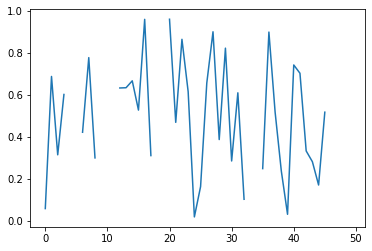

In [21]:
s = pd.Series(np.random.random(50))
s[[4, 5, 9, 11, 18, 19, 33, 34, 46, 47, 48]] = np.nan
s.plot()

<Axes: >

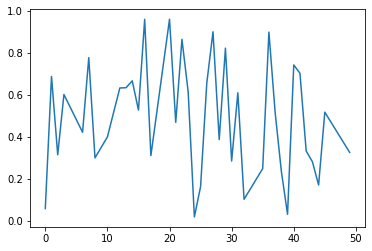

In [22]:
s.interpolate().plot()